# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

##### Importing

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [65]:
# importing data
df = pd.read_csv('/Users/landonwilkins/bootcamp/Week_8/unsupervised_learning_project/Wholesale_Data.csv')

In [66]:
# data cleaning
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [67]:
#capping data to see if that helps outliers instead of deleting 
lower_cap = df.quantile(0.05)
upper_cap = df.quantile(0.95)

df_capped = df.clip(lower=lower_cap, upper=upper_cap, axis=1)

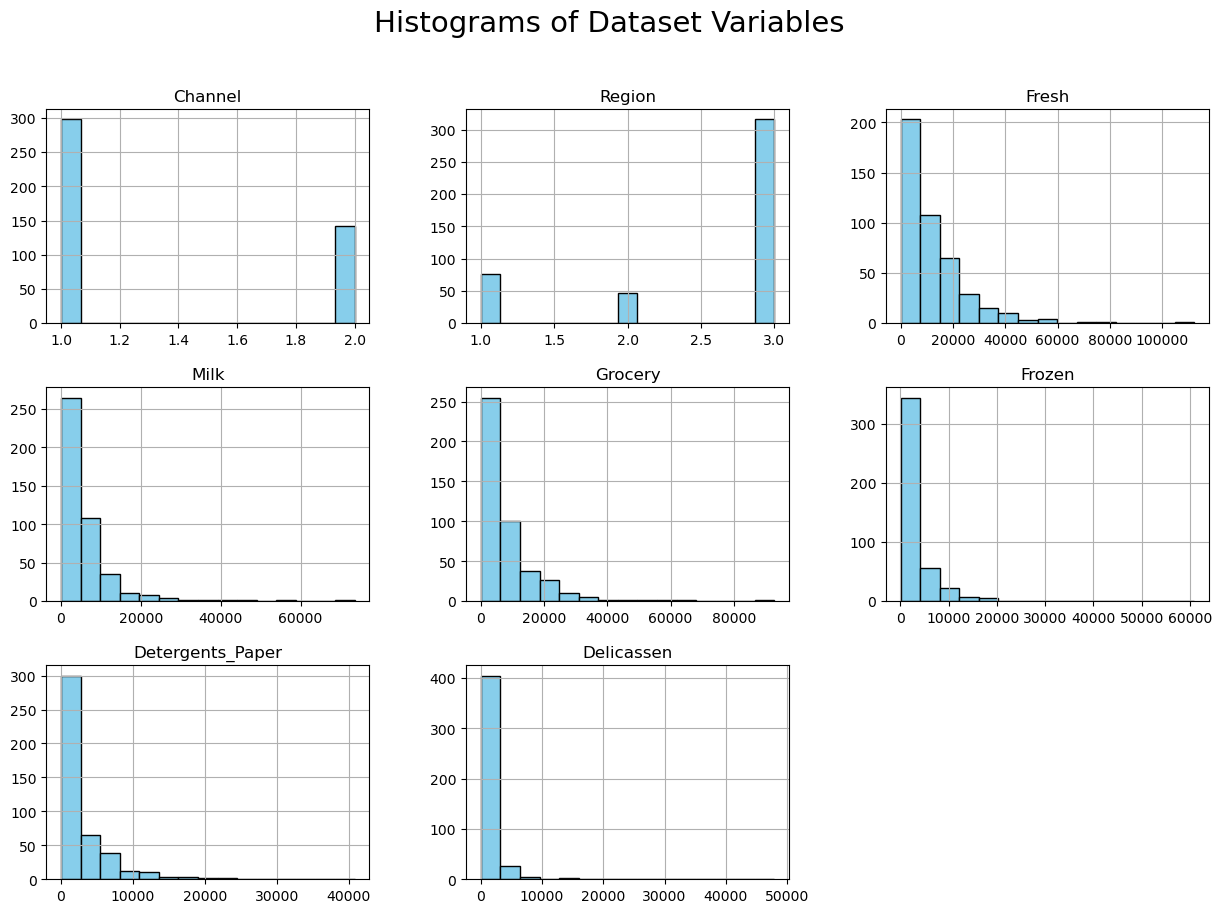

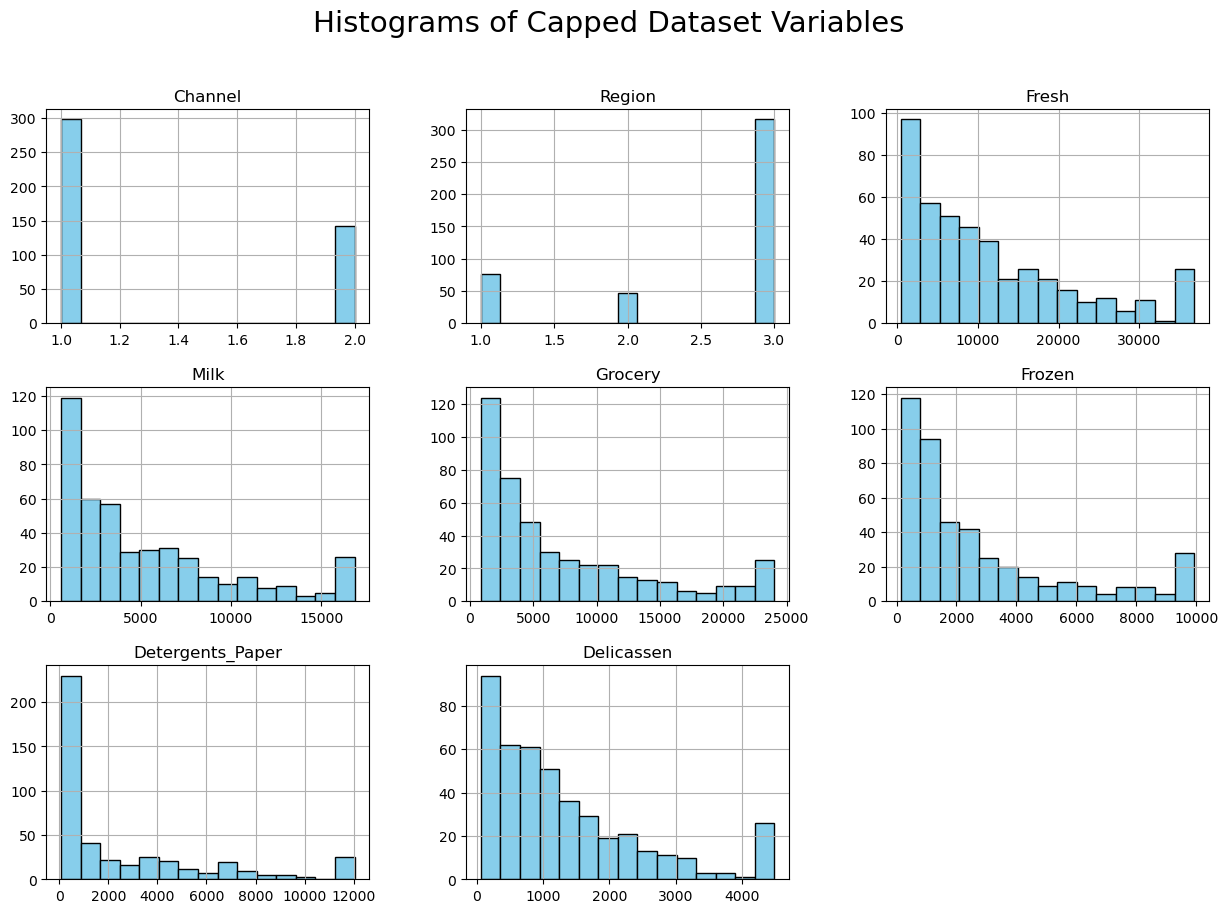

In [68]:
df.hist(bins=15, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.suptitle("Histograms of Dataset Variables", fontsize=21)
plt.show()

df_capped.hist(bins=15, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.suptitle("Histograms of Capped Dataset Variables", fontsize=21)
plt.show()

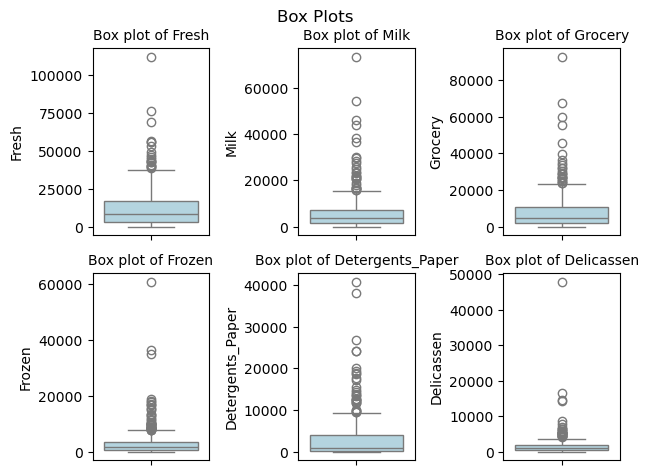

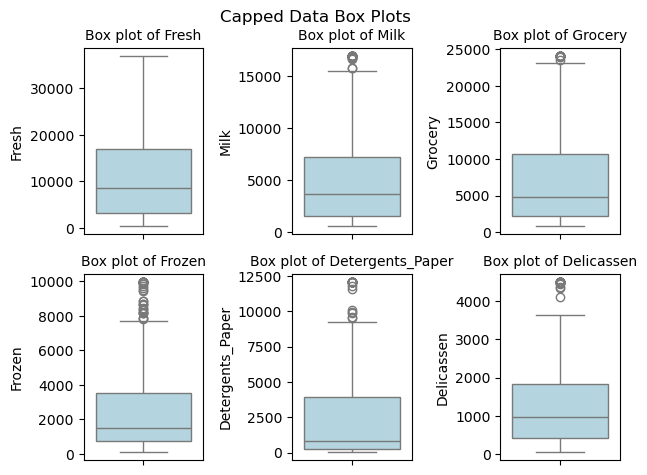

In [69]:
# box plots for outliers
for i, column in enumerate(df.columns[2:], 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[column], color="lightblue")
    plt.title(f'Box plot of {column}', fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Box Plots")
plt.show()

for i, column in enumerate(df_capped.columns[2:], 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df_capped[column], color="lightblue")
    plt.title(f'Box plot of {column}', fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Capped Data Box Plots")
plt.show()

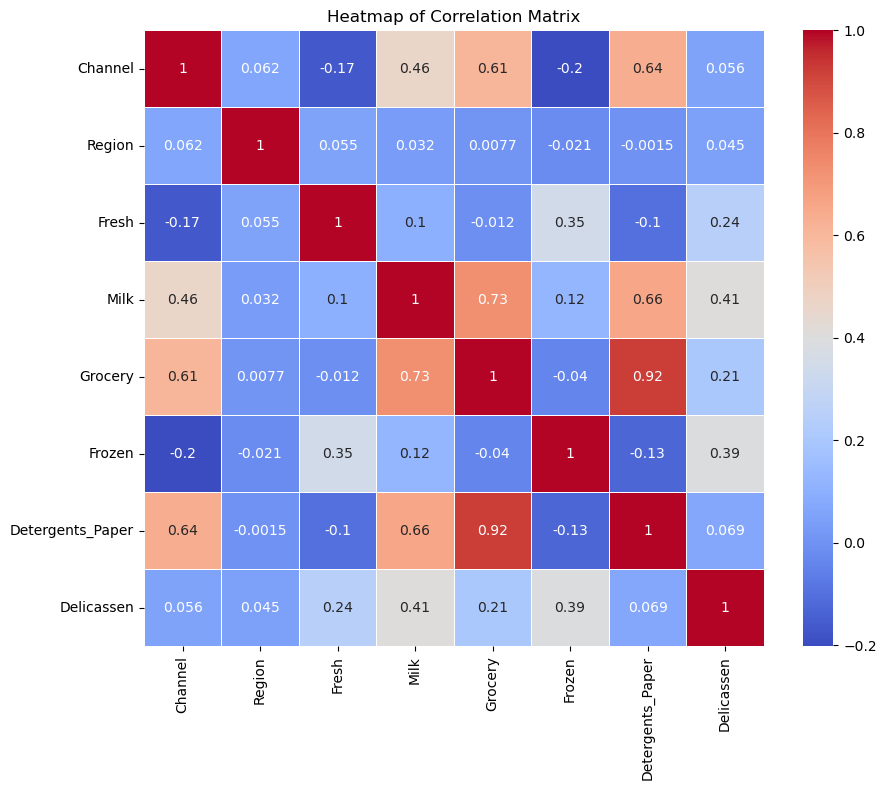

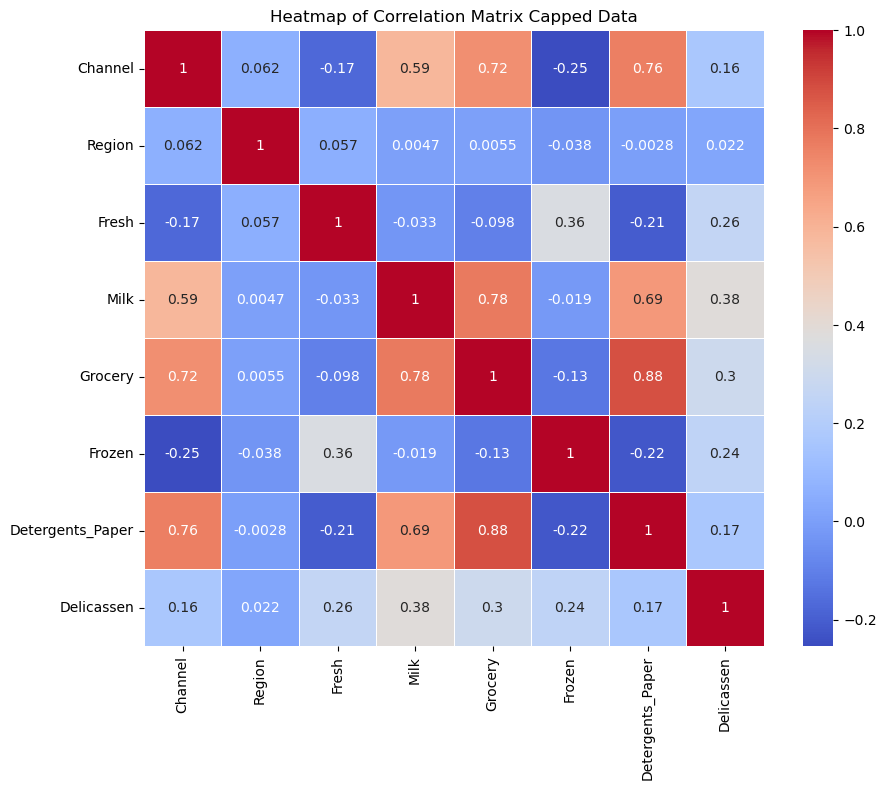

In [70]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = df_capped.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix Capped Data")
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [71]:
inertia = []
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_capped)
    inertia.append(kmeans.inertia_)

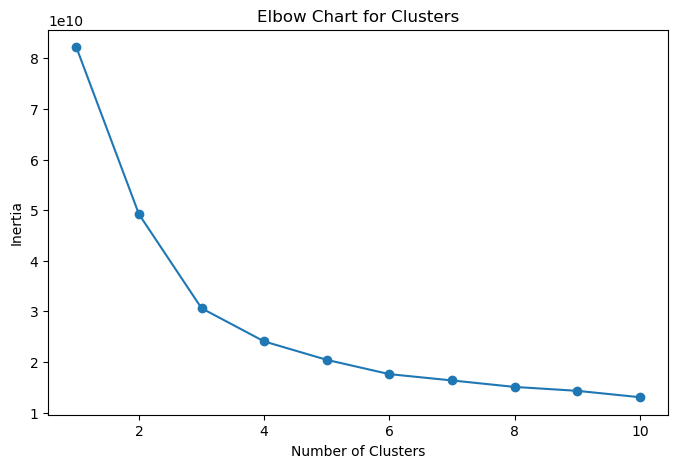

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Chart for Clusters')
plt.show()

In [73]:
best_clusters = 4
kmeans = KMeans(n_clusters=best_clusters, random_state=42)
kmeans.fit(df_capped)
cluster_labels = kmeans.labels_
df_capped['Cluster'] = cluster_labels

In [74]:
cluster_means = df_capped.groupby('Cluster').mean()
print("Cluster Means:\n", cluster_means)

Cluster Means:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.157609  2.516304   4795.352717   3315.323641   4111.705707   
1        1.169492  2.661017  31709.084746   6128.817797   7279.320339   
2        1.218182  2.545455  16033.854545   3005.395455   4242.319545   
3        1.908046  2.517241   5390.194253  10961.839080  17858.977011   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2246.263043       1293.289674   958.535598  
1        4755.442373       1491.257627  2050.200847  
2        3094.760000        998.420909  1219.957273  
3        1577.185057       7867.218391  1616.080460  


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [75]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped.drop(columns='Cluster', errors='ignore'))

In [76]:
linkage_matrix = linkage(df_scaled, method='ward')

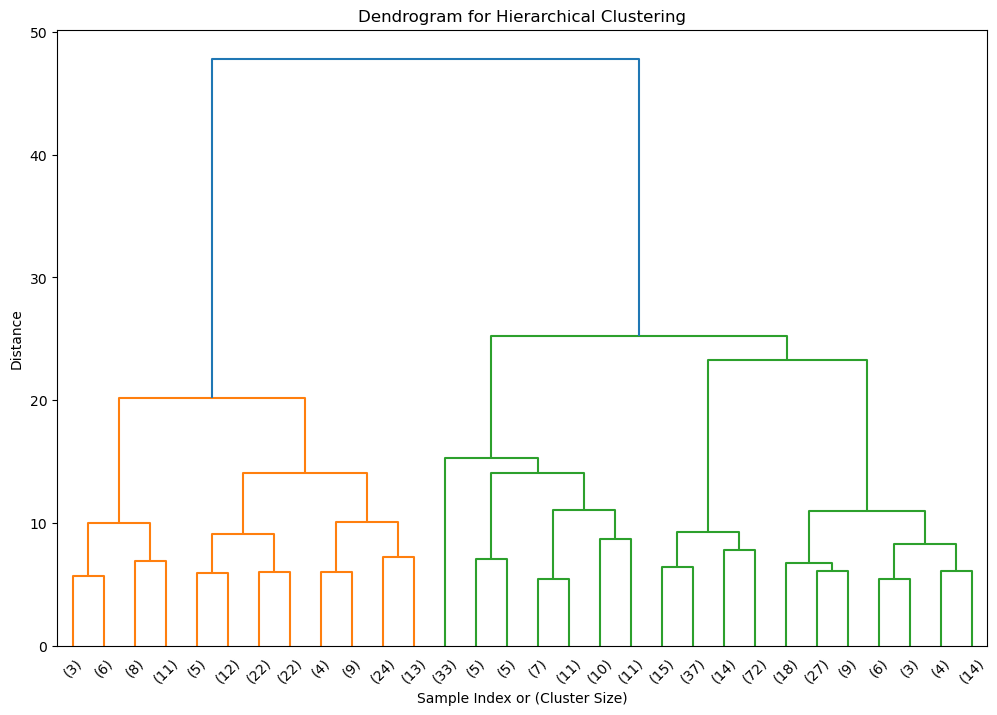

In [77]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.show()


In [81]:
optimal_clusters = 3
cluster_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

df_capped['Hierarchical_Cluster'] = cluster_labels

In [84]:
df_capped.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Cluster', 'Hierarchical_Cluster'],
      dtype='object')

In [86]:
cluster_means = df_capped.groupby('Hierarchical_Cluster').mean()
print("Cluster Means:\n", cluster_means)

Cluster Means:
                        Channel    Region         Fresh         Milk  \
Hierarchical_Cluster                                                  
1                     2.000000  2.640288   8793.267626  9120.412950   
2                     1.000000  2.853659  20701.693902  5103.175610   
3                     1.013699  2.365297   9434.012329  2601.349315   

                           Grocery       Frozen  Detergents_Paper  \
Hierarchical_Cluster                                                
1                     14418.410072  1509.368345       6344.146763   
2                      5321.455488  6089.720732        746.091463   
3                      3497.267352  2111.246119        809.168493   

                       Delicassen   Cluster  
Hierarchical_Cluster                         
1                     1558.296043  2.093525  
2                     2116.782927  1.109756  
3                      830.809817  0.721461  


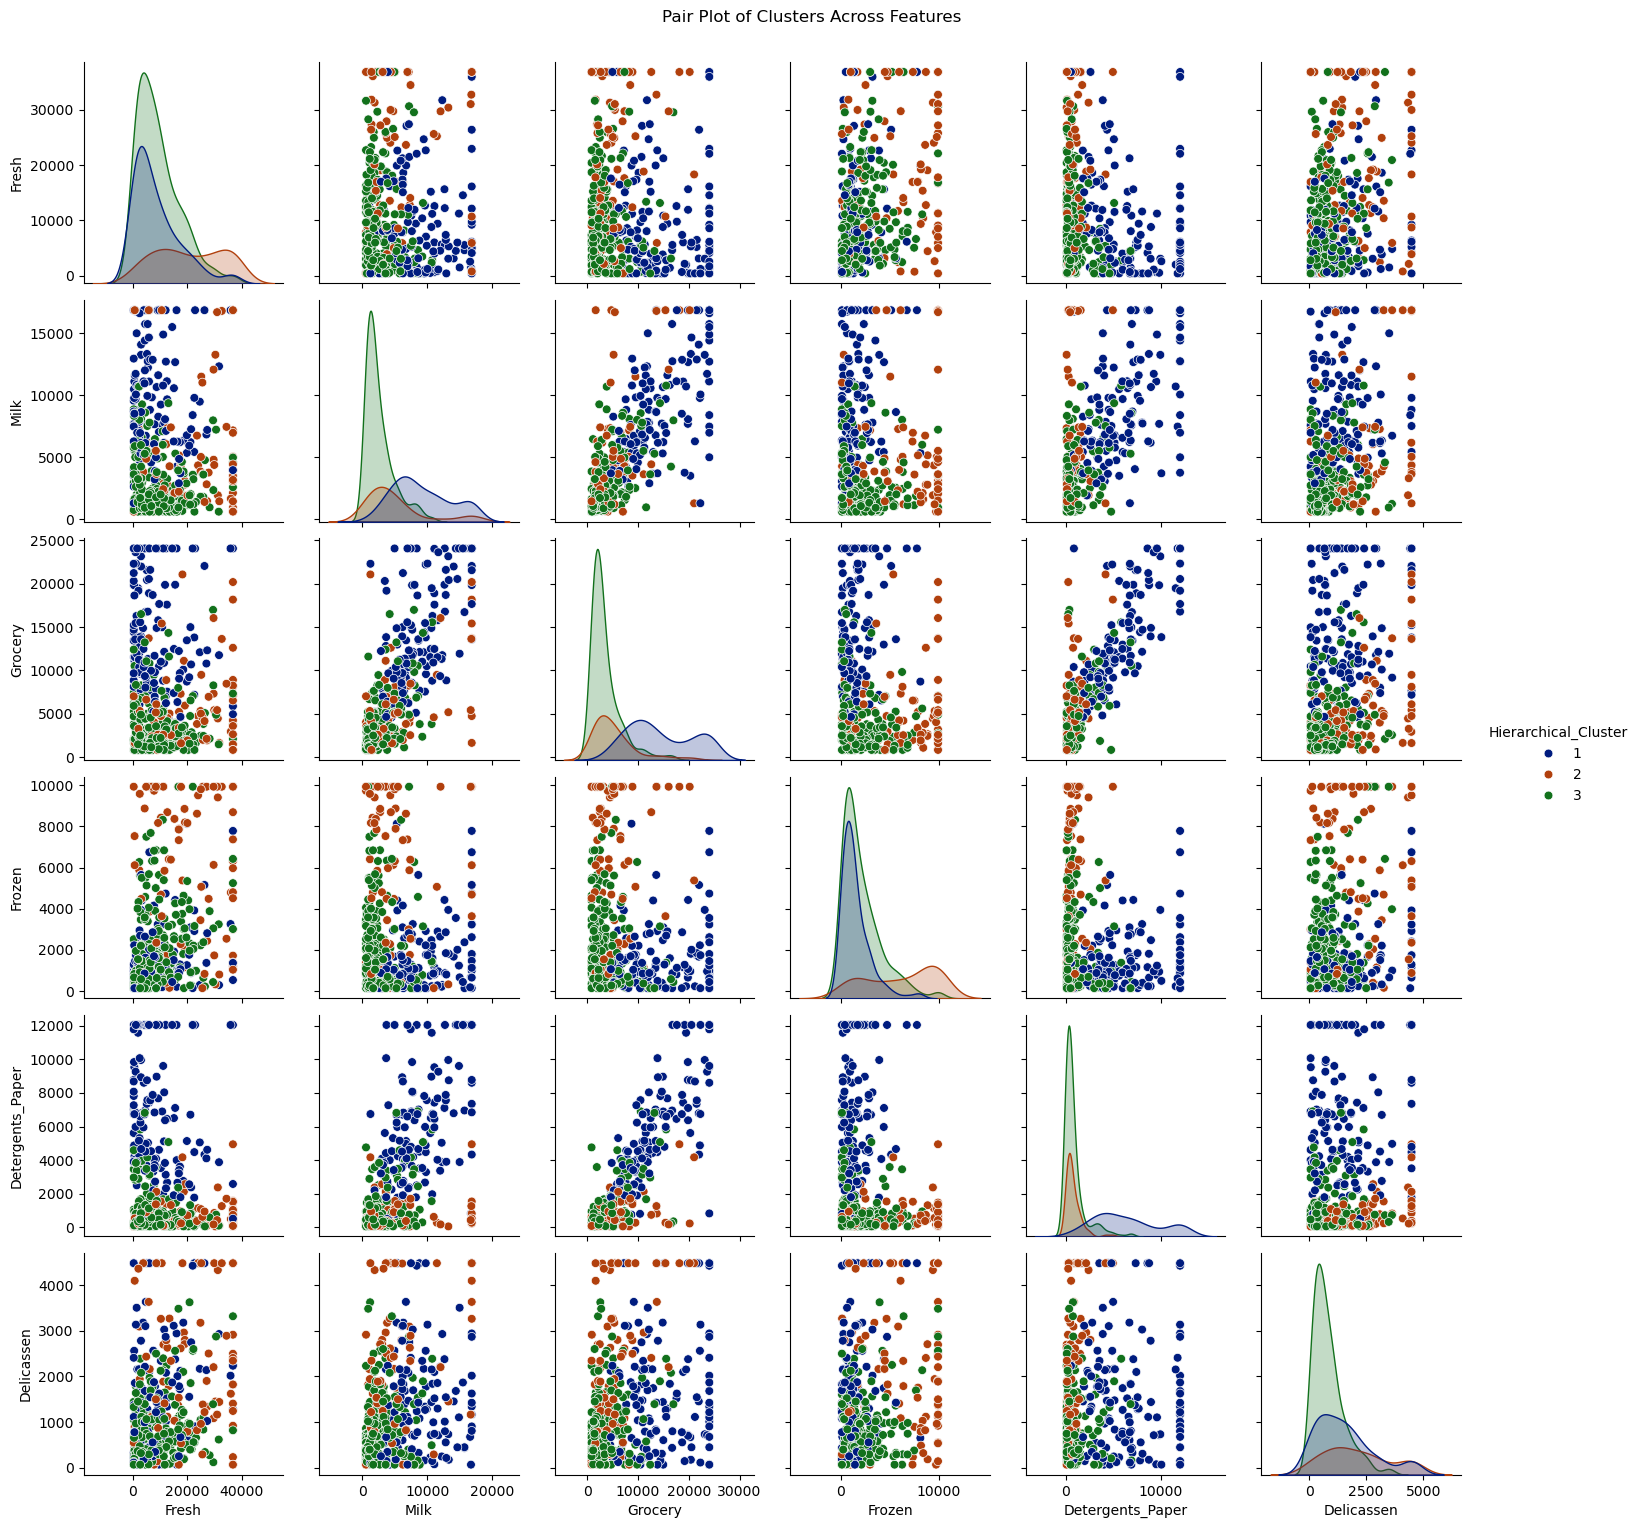

In [88]:
sns.pairplot(df_capped[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen', 'Hierarchical_Cluster']], hue='Hierarchical_Cluster', palette='dark', markers='o', plot_kws={'s': 40})
plt.suptitle('Pair Plot of Clusters Across Features', y=1.02)
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [90]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_capped.drop(columns=['Cluster','Hierarchical_Cluster'], errors='ignore'))

In [91]:
pca = PCA()
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

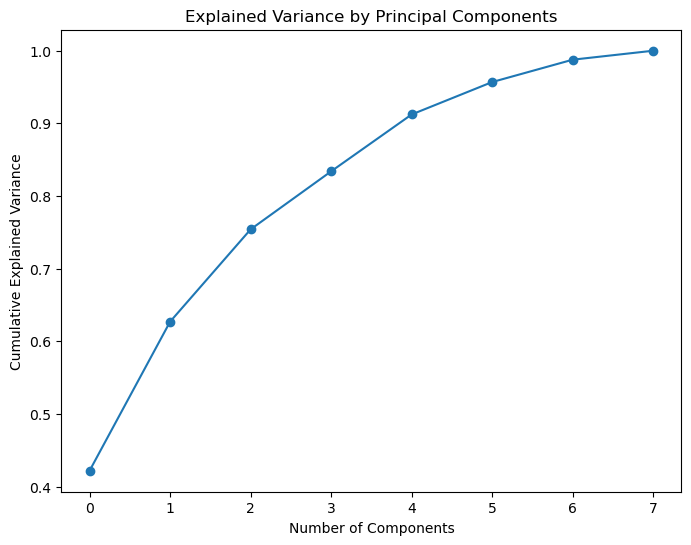

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [98]:
loadings = pd.DataFrame(pca.components_, columns=df_capped.drop(columns=['Cluster','Hierarchical_Cluster'], errors='ignore').columns)

print("Loadings for the first 3 components:")
print(loadings.head(3))


Loadings for the first 3 components:
    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.463350  0.014841 -0.103276  0.459504  0.510829 -0.124952   
1 -0.095163  0.028950  0.571931  0.182648  0.059353  0.571065   
2  0.074201  0.978029  0.121782 -0.046109 -0.030470 -0.138097   

   Detergents_Paper  Delicassen  
0          0.503883    0.181160  
1         -0.076246    0.542391  
2         -0.030636   -0.007646  


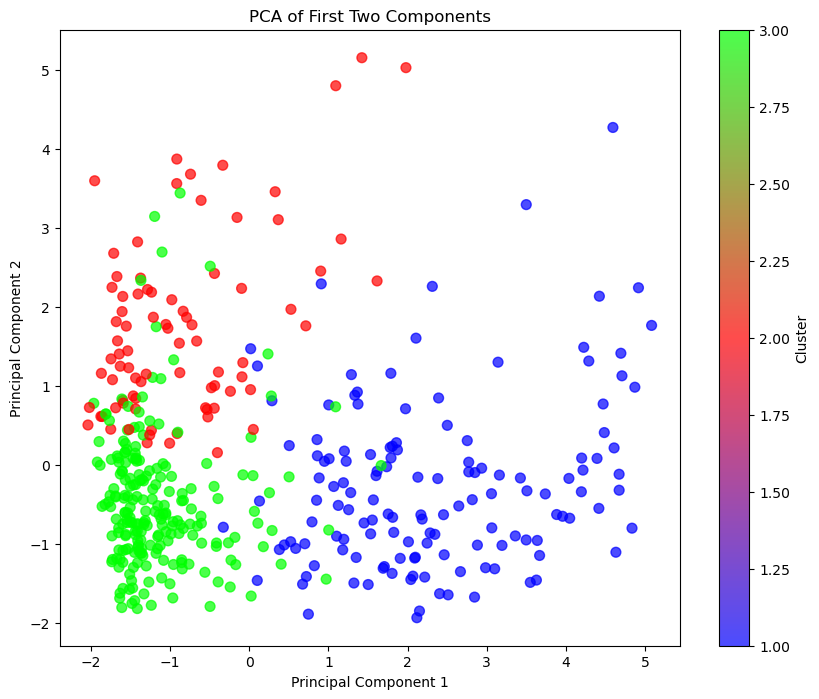

In [97]:
# Visualize the data using the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_capped['Hierarchical_Cluster'], cmap='brg', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of First Two Components')
plt.colorbar(label='Cluster')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##### Point 1

Low spenders seem to focus on deli and milk. They seem to come into the store for specialty items instead of household staples.

##### Point 2

There is a group of spenders that spend on Fresh, Frozen, and Deli. This group of people most likely prioritizes healthy food habits with convenience.

##### Point 3

High spenders tend to buy grocery and paper_detergent products. This means that they do all of their main shopping at this store and like to stock up on household essentials. 

##### Point 4

In my PCA analysis, PC3 had a strong region influence. This could mean that there are regional differences in purchasing patterns. 